In [ ]:
%cd /content/drive/MyDrive/Machine Learning/Lab 07

[Errno 2] No such file or directory: '/content/drive/MyDrive/Machine Learning/Lab 07'
/content


In [ ]:
ls


airplane_landing_199029.jpg  CIFAR10_model_simple.h5  sample_data/
checkmodel.h5                image.jpg


In [ ]:
# step 1.1: download an online image
!wget https://images.all-free-download.com/images/graphicthumb/airplane_landing_199029.jpg

--2023-04-15 22:43:41--  https://images.all-free-download.com/images/graphicthumb/airplane_landing_199029.jpg
Resolving images.all-free-download.com (images.all-free-download.com)... 51.81.66.158
Connecting to images.all-free-download.com (images.all-free-download.com)|51.81.66.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42917 (42K) [image/jpeg]
Saving to: ‘airplane_landing_199029.jpg.1’

airplane_landing_19 100%[===================>]  41.91K  --.-KB/s    in 0s      

2023-04-15 22:43:42 (222 MB/s) - ‘airplane_landing_199029.jpg.1’ saved [42917/42917]



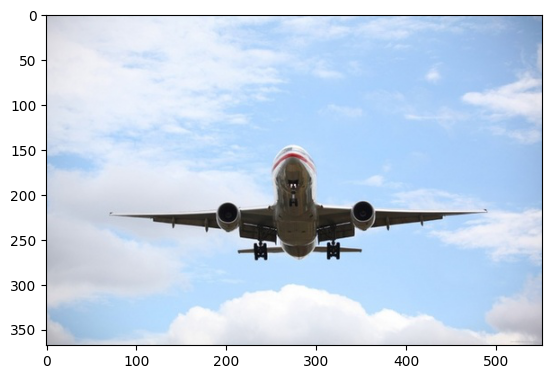

In [ ]:
# step 1.2: load image into python
import matplotlib.pyplot as plt
data = plt.imread('airplane_landing_199029.jpg')
plt.imshow(data)
plt.show()

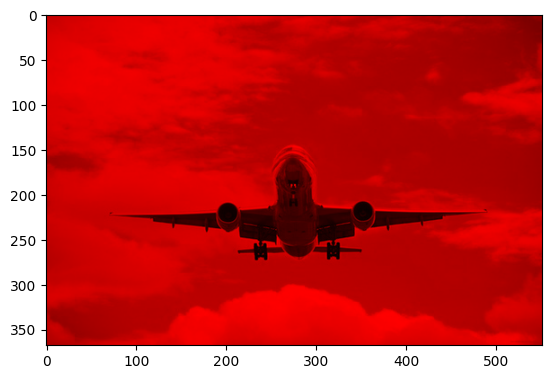

In [ ]:
# step 2.1: Modify the image to red channel only
data_modified = data.copy()
data_modified[:,:,1] = 0 # set intensity of green channel to 0
data_modified[:,:,2] = 0 # set intensity of blue channel to 0
plt.imshow(data_modified) # only show red channel
plt.show()

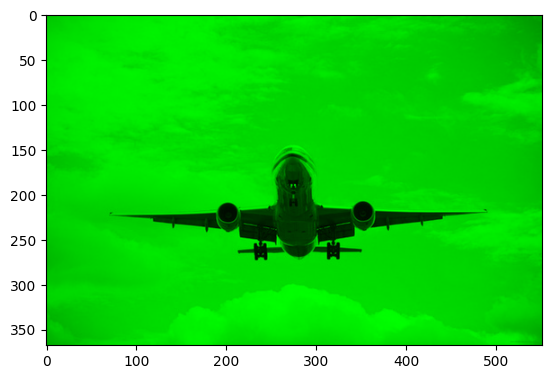

In [ ]:
# step 2.2: Modify the image to green channel only
data_modified = data.copy()
data_modified[:,:,0] = 0 # set intensity of red channel to 0
data_modified[:,:,2] = 0 # set intensity of blue channel to 0
plt.imshow(data_modified) # only show red channel
plt.show()

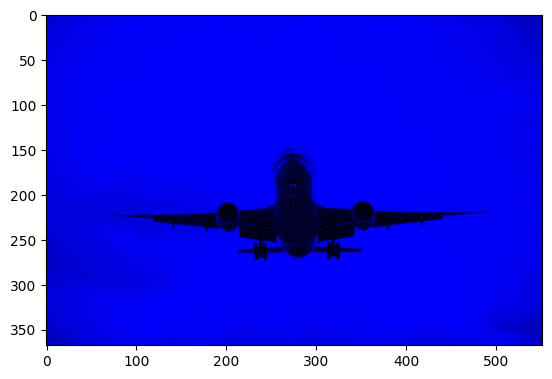

In [ ]:
#MODIFY TO BLUE
data_modified = data.copy()
data_modified[:,:,0] = 0 # set intensity of red channel to 0
data_modified[:,:,1] = 0 # set intensity of green channel to 0
plt.imshow(data_modified) # only show red channel
plt.show()

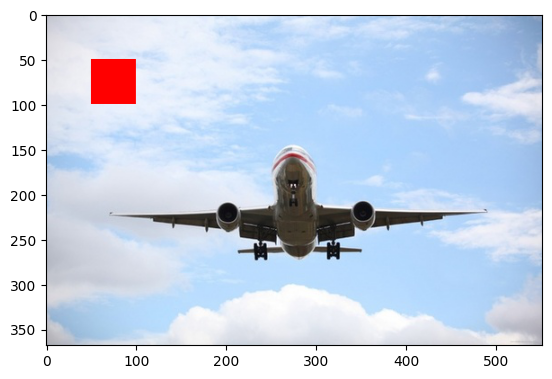

In [ ]:
# step 3.1: Add red mask to the specific regions within the image**
data_modified = data.copy()
data_modified[50:100,50:100,:] = [255,0,0] # change subregion to red only, make sure the order of channel colors is [red,green,blue]
plt.imshow(data_modified)
plt.show()

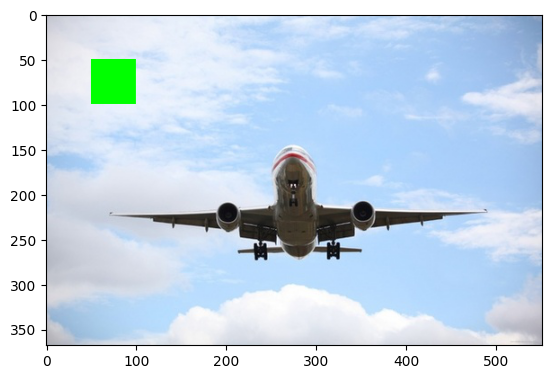

In [ ]:
# step 3.2: Add green mask to the specific regions within the image**
data_modified = data.copy()
data_modified[50:100,50:100,:] = [0,255,0] # change subregion to green only, make sure the order of channel colors is [red,green,blue]
plt.imshow(data_modified)
plt.show()

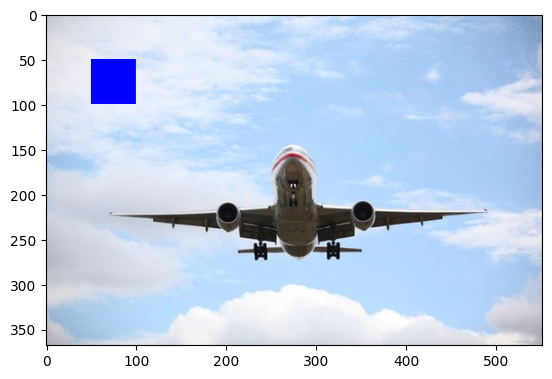

In [ ]:
#ADD BLUE MASK
data_modified = data.copy()
data_modified[50:100,50:100,:] = [0,0,255] 
plt.imshow(data_modified)
plt.show()


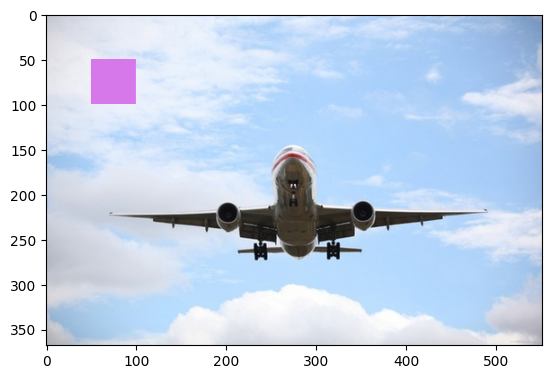

In [ ]:
#ADD NEW COLOR MASK
data_modified = data.copy()
data_modified[50:100,50:100,:] = [215,120,234]
plt.imshow(data_modified)
plt.show()

In [ ]:
# Step 4: Apply image processing on the CIFAR10 image dataset 
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

labels_map = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (50000, 32, 32, 3)
X_test shape:  (10000, 32, 32, 3)
y_train shape:  (50000, 1)
y_test shape:  (10000, 1)


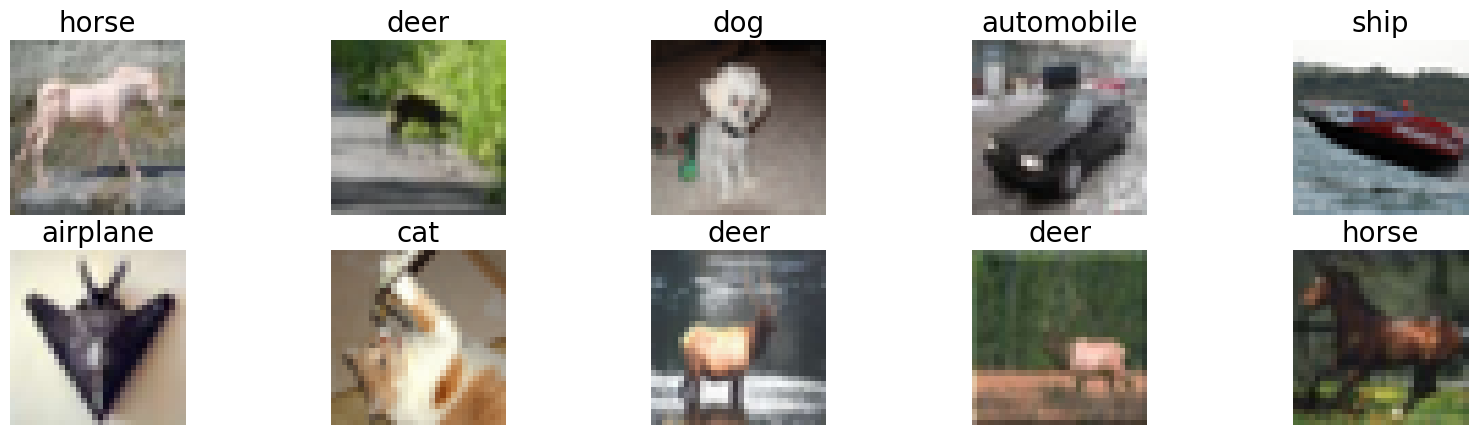

In [ ]:
# Step 5: Image visualization using matplotlib
fig = plt.figure(figsize=(20, 5))
for ii in range(10):
   # sample a random image from X_train
   image_indx = np.random.choice(range(len(X_train)))
   image_random = X_train[image_indx]
   image_title = labels_map[y_train[image_indx][-1]]
    
   # put image into subplots
   imgplot = fig.add_subplot(2,5,ii+1) 
   imgplot.imshow(image_random)
   imgplot.set_title(image_title, fontsize=20)
   imgplot.axis('off')

In [ ]:
# Step 6.1: sample a random image
image_index = np.random.choice(range(len(X_train)))
image_example = X_train[image_index]

In [ ]:
# Step 6.2:  Use the Python Imaging Library 'PIL' to save image into local file
import PIL
img = PIL.Image.fromarray(X_train[image_index])
img.save('image.jpg')


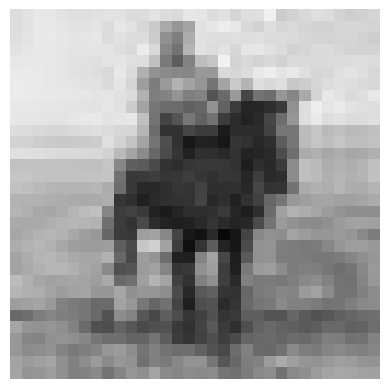

In [ ]:
# Step 6.3:  reload image into python
import matplotlib.pyplot as plt
data = plt.imread('image.jpg') # read the local image
plt.imshow(data)
plt.axis('off')
plt.show()

In [ ]:
print("The shape of image is: ", data.shape)

The shape of image is:  (32, 32, 3)


In [ ]:
## Step 7.1: Load the dataset
from keras.datasets import cifar10
(X_data, y_data), (X_test, y_test) = cifar10.load_data()
print("Training matrix shape", X_data.shape)
print("Testing matrix shape", X_test.shape)
print("y_data matrix shape", y_data.shape)
print("y_test matrix shape", y_test.shape)
print("y_data: ",y_data)

Training matrix shape (50000, 32, 32, 3)
Testing matrix shape (10000, 32, 32, 3)
y_data matrix shape (50000, 1)
y_test matrix shape (10000, 1)
y_data:  [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


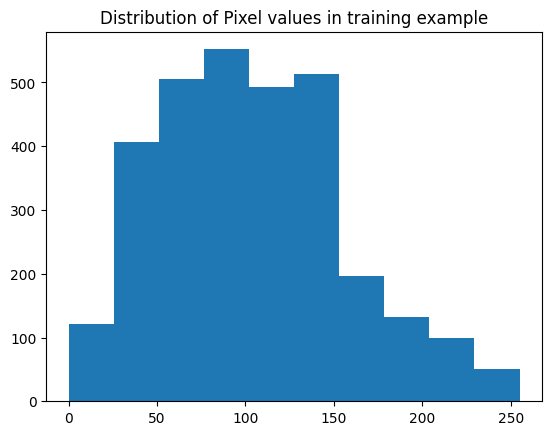

In [ ]:
## Step 7.2: Plot the histogram for the pixels in each image
from matplotlib import pyplot as plt 
plt.hist(X_data[0].flatten(),) 
plt.title("Distribution of Pixel values in training example") 
plt.show()

In [ ]:
print("Shape pf X_data: ", X_data.shape) # check the shape of original data
N_train = X_data.shape[0]  # the first dimension of the tensor is number of total images
D_train = 32*32*3   # the remaining dimensions of the tensor is the shape of image, you can also use X_data.shape[1]*X_data.shape[2]*X_data.shape[3]
X_data_flatten = X_data.reshape(N_train, D_train)
X_data_flatten = X_data_flatten.astype('float32')

N_test = X_test.shape[0]
D_test = 32*32*3
X_test_flatten = X_test.reshape(N_test,D_test)
X_test_flatten = X_test_flatten.astype('float32')

print("Training matrix shape", X_data_flatten.shape)
print("Testing matrix shape", X_test_flatten.shape)

Shape pf X_data:  (50000, 32, 32, 3)
Training matrix shape (50000, 3072)
Testing matrix shape (10000, 3072)


In [ ]:
X_data_flatten /= 255
X_test_flatten /= 255

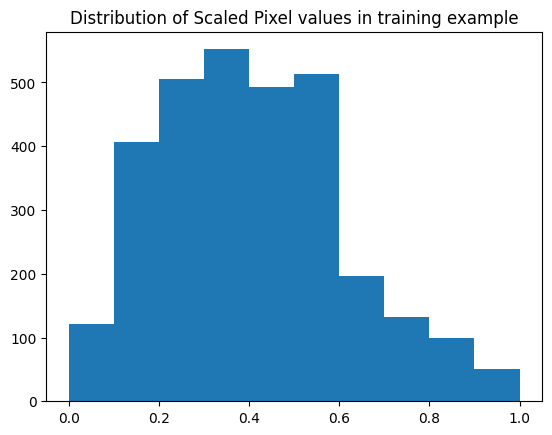

In [ ]:
from matplotlib import pyplot as plt 
plt.hist(X_data_flatten[0].flatten(),) 
plt.title("Distribution of Scaled Pixel values in training example") 
plt.show()

In [ ]:
print(y_data)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [ ]:
labels_map = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
nb_classes = len(labels_map)

import tensorflow as tf
y_data_categorical = tf.keras.utils.to_categorical(y_data, nb_classes)
y_test_categorical = tf.keras.utils.to_categorical(y_test, nb_classes)

print("y_data matrix shape", y_data_categorical.shape)
print("y_test matrix shape", y_test_categorical.shape)
print("y_test_categorical: ",y_test_categorical)

y_data matrix shape (50000, 10)
y_test matrix shape (10000, 10)
y_test_categorical:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
print("y_data: ",y_data.shape)

y_data:  (50000, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

## Set up training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_data_flatten,y_data_categorical, test_size=0.2, random_state=42)
def build_model(n_layers = 3, n_neurons = 1000):
   model = Sequential() # create Sequential model
   for i in range(n_layers-1):
       model.add(Dense(n_neurons, activation = 'relu')) # you can also try other types of activation functions
   model.add(Dense(10, activation = 'softmax'))  # the output must be softmax for multi-class classifcation

   return model

model = build_model(n_layers = 3, n_neurons = 1000)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])
train_history = model.fit(X_train,y_train, validation_data=(X_val,y_val), batch_size=128, epochs = 20)

Epoch 1/20
313/313 [==============================] - 6s 11ms/step - loss: 1.9484 - accuracy: 0.3149 - val_loss: 1.7595 - val_accuracy: 0.3688
Epoch 2/20
313/313 [==============================] - 3s 10ms/step - loss: 1.6813 - accuracy: 0.3993 - val_loss: 1.6279 - val_accuracy: 0.4189
Epoch 3/20
313/313 [==============================] - 3s 9ms/step - loss: 1.5955 - accuracy: 0.4321 - val_loss: 1.5663 - val_accuracy: 0.4397
Epoch 4/20
313/313 [==============================] - 3s 10ms/step - loss: 1.5406 - accuracy: 0.4487 - val_loss: 1.5512 - val_accuracy: 0.4372
Epoch 5/20
313/313 [==============================] - 2s 6ms/step - loss: 1.4887 - accuracy: 0.4692 - val_loss: 1.5309 - val_accuracy: 0.4561
Epoch 6/20
313/313 [==============================] - 2s 6ms/step - loss: 1.4552 - accuracy: 0.4805 - val_loss: 1.4807 - val_accuracy: 0.4678
Epoch 7/20
313/313 [==============================] - 2s 7ms/step - loss: 1.4185 - accuracy: 0.4955 - val_loss: 1.5060 - val_accuracy: 0.4624
Epo

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 1000)              3073000   
                                                                 
 dense_43 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_44 (Dense)            (None, 10)                10010     
                                                                 
Total params: 4,084,010
Trainable params: 4,084,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Step 11.1:  Access the model training history 
print(train_history.history.keys())
print(train_history.history['loss'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[1.9484388828277588, 1.6813222169876099, 1.5955142974853516, 1.5406397581100464, 1.4887019395828247, 1.455210566520691, 1.4184767007827759, 1.3914662599563599, 1.3508929014205933, 1.3250800371170044, 1.3029571771621704, 1.2660568952560425, 1.2439601421356201, 1.221266269683838, 1.1879761219024658, 1.1690930128097534, 1.133779764175415, 1.1097251176834106, 1.0830401182174683, 1.0612646341323853]


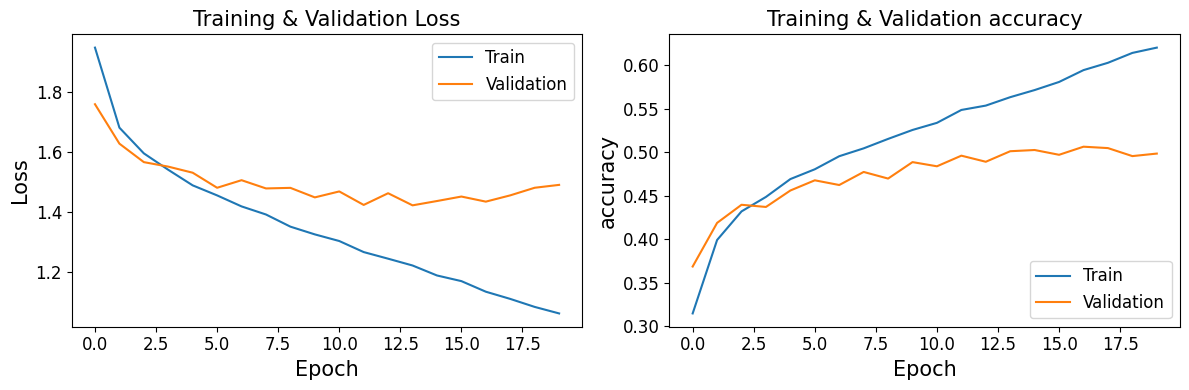

In [ ]:
# Step 11.2:  Plot the learning curves for training/validation
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(train_history.history['loss'], label='Train')
plt.plot(train_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(train_history.history['accuracy'], label='Train')
plt.plot(train_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Step 12:  Let's check the predicted labels of training data using the trained model
train_predicted_labels = model.predict(X_train[0:5,:]) # here we only predict the labels of first 5 images
print("Shape: ",train_predicted_labels.shape)
print(train_predicted_labels)

1/1 [==============================] - 0s 49ms/step
Shape:  (5, 10)
[[1.28711117e-02 4.91057672e-02 2.32153218e-02 7.19624013e-02
  6.54836744e-02 6.17854334e-02 6.79533899e-01 1.59569290e-02
  7.62037560e-03 1.24649713e-02]
 [2.03957185e-02 4.62172896e-01 1.22508481e-01 7.45576248e-02
  1.10569317e-02 5.46558425e-02 4.11780663e-02 4.71421555e-02
  1.66554321e-02 1.49676800e-01]
 [2.04975158e-02 8.75027181e-05 1.16874829e-01 2.37290449e-02
  4.30075359e-03 5.14499724e-01 5.02365656e-05 3.19204897e-01
  1.08003796e-05 7.44685240e-04]
 [8.05033185e-03 1.52873462e-02 2.30760127e-02 1.00955285e-01
  5.69969341e-02 3.91957313e-02 7.33476043e-01 1.72600709e-02
  1.13332074e-03 4.56889020e-03]
 [2.50777339e-05 5.37109375e-03 2.66796052e-02 5.79186499e-01
  1.24078365e-02 2.89099187e-01 5.17392356e-04 8.62624571e-02
  8.80679090e-06 4.41986049e-04]]


In [ ]:
import numpy as np
np.argmax(train_predicted_labels,axis=1) # find the index of column which has maximum value in each row

array([6, 1, 5, 6, 3])

In [ ]:
# Step 13:  Evaluate the classification performance
from sklearn.metrics import accuracy_score

In [ ]:
def evaluate_model(model,train_data,val_data,test_data):
   X_train,y_train = train_data
   X_val,y_val = val_data
   X_test,y_test = test_data
    # (1) make a prediction on training set to get probablities for all classes, select the class that has maximum probablity
   y_train_pred = np.argmax(model.predict(X_train), axis=-1) 
   # (2) calculate the training classification error
   Train_error_s = 1 - accuracy_score(np.argmax(y_train,axis=1), y_train_pred)
    # (3) make a prediction on validation set
   y_val_pred = np.argmax(model.predict(X_val), axis=-1) 
    # (4) calculate the validation classification error
   Val_error_s = 1 - accuracy_score(np.argmax(y_val,axis=1), y_val_pred)
   # (5) make a prediction on test set
   y_test_pred = np.argmax(model.predict(X_test), axis=-1) 
    # (6) calculate the test classification error
   Test_error_s = 1 - accuracy_score(y_test, y_test_pred)
    # (7) reporting results
   print("Train error: ", Train_error_s)
   print("Validation error: ", Val_error_s)
   print("Test error: ", Test_error_s)
   return Train_error_s,Val_error_s,Test_error_s


In [ ]:
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train,y_train),(X_val,y_val),(X_test_flatten,y_test))

313/313 [==============================] - 1s 2ms/step
Train error:  0.36282499999999995
Validation error:  0.5015000000000001
Test error:  0.49339999999999995


In [ ]:
# Step 14: Implement a function for visualizing the improvements over attempts
def visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test):
   import matplotlib.pyplot as plt
   plt.figure(figsize=(12,4))
   
   # Plot training error values
   plt.subplot(1,3,1)
   plt.plot(improvement_log_train, label='Train')
   plt.title('Training error', fontsize=15)
   plt.ylabel('Error', fontsize=15)
   plt.xlabel('Process', fontsize=15)
   plt.xticks(range(len(improvement_log_train)), fontsize=12)
   plt.yticks( fontsize=12)
   plt.legend(loc='upper right', fontsize=12)

   # Plot Validation error values
   plt.subplot(1,3,2)
   plt.plot(improvement_log_val, label='Validation')
   plt.title('Validation error', fontsize=15)
   plt.ylabel('Error', fontsize=15)
   plt.xlabel('Process', fontsize=15)
   plt.xticks(range(len(improvement_log_val)), fontsize=12)
   plt.yticks( fontsize=12)
   plt.legend(loc='upper right', fontsize=12)

   # Plot testing error values
   plt.subplot(1,3,3)
   plt.plot(improvement_log_test, label='Test')
   plt.title('Test error', fontsize=15)
   plt.ylabel('Error', fontsize=15)
   plt.xlabel('Process', fontsize=15)
   plt.xticks(range(len(improvement_log_test)), fontsize=12)
   plt.yticks( fontsize=12)
 
   plt.legend(loc='upper right', fontsize=12)
   plt.tight_layout()
   plt.show()

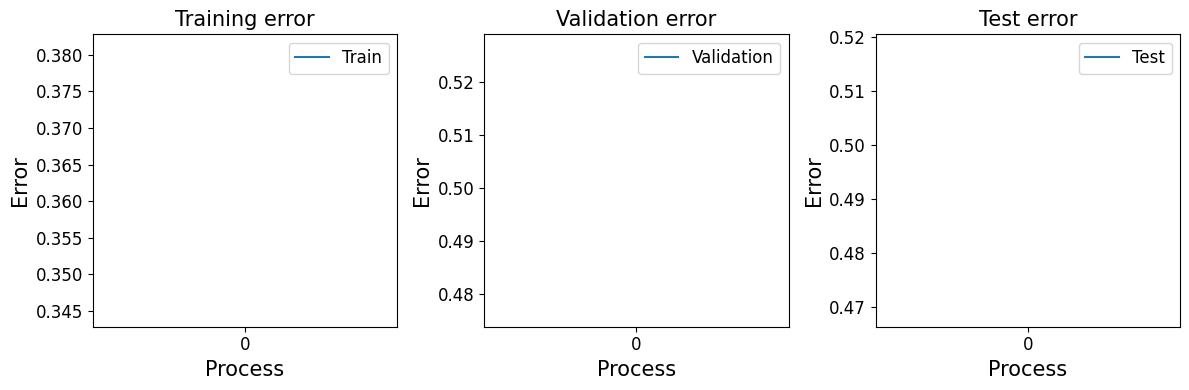

In [ ]:
improvement_log_train = []
improvement_log_val = []
improvement_log_test = []
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

In [ ]:
# Step 15.0: import the load_model function
from tensorflow.keras.models import load_model

# Step 15.1: save model to local file
model.save("CIFAR10_model_simple.h5")

# Step 15.2: reload model from the local file
model_loaded = load_model("CIFAR10_model_simple.h5")

# Step 15.3: you are supposed to see same performance as previous one
y_test_pred = np.argmax(model.predict(X_test_flatten), axis=-1) 
Test_error_s = 1 - accuracy_score(y_test, y_test_pred)

print("Test results: ",Test_error_s)

313/313 [==============================] - 1s 2ms/step
Test results:  0.49339999999999995


In [ ]:
# Step 16: second attempt: Check if feature normalization improves results 
def build_model(n_layers = 2, n_neurons = 1000):
    model = Sequential() # create Sequential model
    for i in range(n_layers-1):
          model.add(Dense(n_neurons, activation = 'relu')) # you can also try other types of activation functions

    model.add(Dense(10, activation = 'softmax'))  # the output must be softmax for multi-class classifcation
    return model

In [ ]:
model = build_model(n_layers = 3, n_neurons = 1000)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
# Step 16.2: Apply feature normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.astype(np.float32))
X_val_s = scaler.transform(X_val.astype(np.float32))
X_test_s = scaler.transform(X_test_flatten.astype(np.float32))

In [ ]:
# Step 16.3: Training the model on the scaled data
train_history = model.fit(X_train_s,y_train, validation_data=(X_val_s,y_val), batch_size=128, epochs = 20) # Make sure using scaled training and scaled validation. 

# Step 16.4: Evaluate this model again to see any improvements
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train_s,y_train),(X_val_s,y_val),(X_test_s,y_test))

Epoch 1/20
313/313 [==============================] - 4s 11ms/step - loss: 1.7636 - accuracy: 0.3953 - val_loss: 1.5828 - val_accuracy: 0.4333
Epoch 2/20
313/313 [==============================] - 2s 6ms/step - loss: 1.4671 - accuracy: 0.4790 - val_loss: 1.5126 - val_accuracy: 0.4724
Epoch 3/20
313/313 [==============================] - 2s 7ms/step - loss: 1.3613 - accuracy: 0.5154 - val_loss: 1.4589 - val_accuracy: 0.4924
Epoch 4/20
313/313 [==============================] - 2s 5ms/step - loss: 1.2648 - accuracy: 0.5496 - val_loss: 1.4623 - val_accuracy: 0.4949
Epoch 5/20
313/313 [==============================] - 2s 5ms/step - loss: 1.1961 - accuracy: 0.5760 - val_loss: 1.4721 - val_accuracy: 0.5056
Epoch 6/20
313/313 [==============================] - 2s 6ms/step - loss: 1.1214 - accuracy: 0.6023 - val_loss: 1.4651 - val_accuracy: 0.5043
Epoch 7/20
313/313 [==============================] - 2s 5ms/step - loss: 1.0524 - accuracy: 0.6266 - val_loss: 1.4821 - val_accuracy: 0.5199
Epoch

In [ ]:
# Step 16.5: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

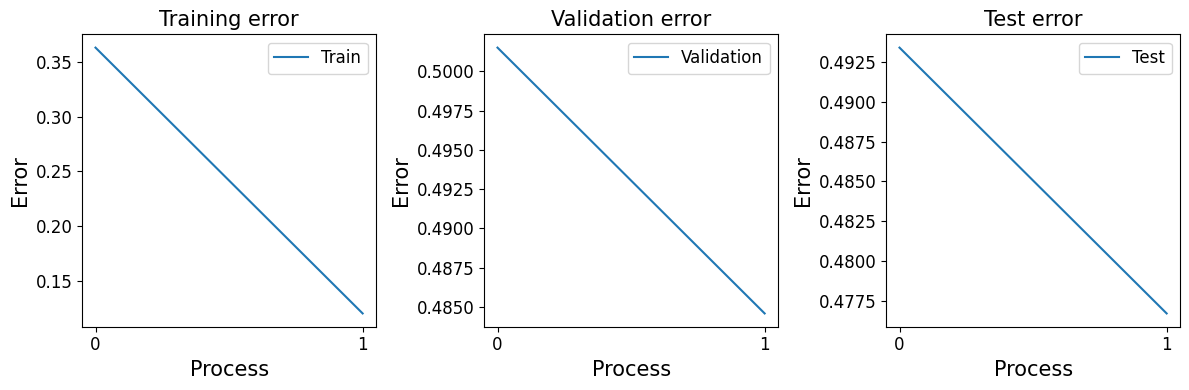

In [ ]:
visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

In [ ]:
# Step 17: third attempt: increase model complexity by adding more hidden layers
def build_model(n_layers = 5, n_neurons = 1000):
    model = Sequential() # create Sequential model
    for i in range(n_layers-1):
          model.add(Dense(n_neurons, activation = 'relu')) # you can also try other types of activation functions

    model.add(Dense(10, activation = 'softmax'))  # the output must be softmax for multi-class classifcation
    return model

In [ ]:
# Step 17.1: let's increase the number of layers in model definition 
model = build_model(n_layers = 5, n_neurons = 1000)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
# Step 17.2: let's re-use Step 16's code, and include the normalization step due to its improvement.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.astype(np.float32))
X_val_s = scaler.transform(X_val.astype(np.float32))
X_test_s = scaler.transform(X_test_flatten.astype(np.float32))

# Step 17.3: Let's start retraining the model
train_history = model.fit(X_train_s,y_train, validation_data=(X_val_s,y_val), batch_size=128, epochs = 20)
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train_s,y_train),(X_val_s,y_val),(X_test_s,y_test))

Epoch 1/20
313/313 [==============================] - 5s 8ms/step - loss: 1.7273 - accuracy: 0.3867 - val_loss: 1.5443 - val_accuracy: 0.4541
Epoch 2/20
313/313 [==============================] - 2s 6ms/step - loss: 1.4929 - accuracy: 0.4703 - val_loss: 1.5070 - val_accuracy: 0.4627
Epoch 3/20
313/313 [==============================] - 2s 5ms/step - loss: 1.3802 - accuracy: 0.5109 - val_loss: 1.4671 - val_accuracy: 0.4869
Epoch 4/20
313/313 [==============================] - 2s 6ms/step - loss: 1.2791 - accuracy: 0.5471 - val_loss: 1.4438 - val_accuracy: 0.5013
Epoch 5/20
313/313 [==============================] - 2s 6ms/step - loss: 1.1938 - accuracy: 0.5725 - val_loss: 1.4324 - val_accuracy: 0.5060
Epoch 6/20
313/313 [==============================] - 2s 6ms/step - loss: 1.1149 - accuracy: 0.6010 - val_loss: 1.4435 - val_accuracy: 0.5093
Epoch 7/20
313/313 [==============================] - 2s 7ms/step - loss: 1.0441 - accuracy: 0.6229 - val_loss: 1.5257 - val_accuracy: 0.5106
Epoch 

In [ ]:
# Step 17.4: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

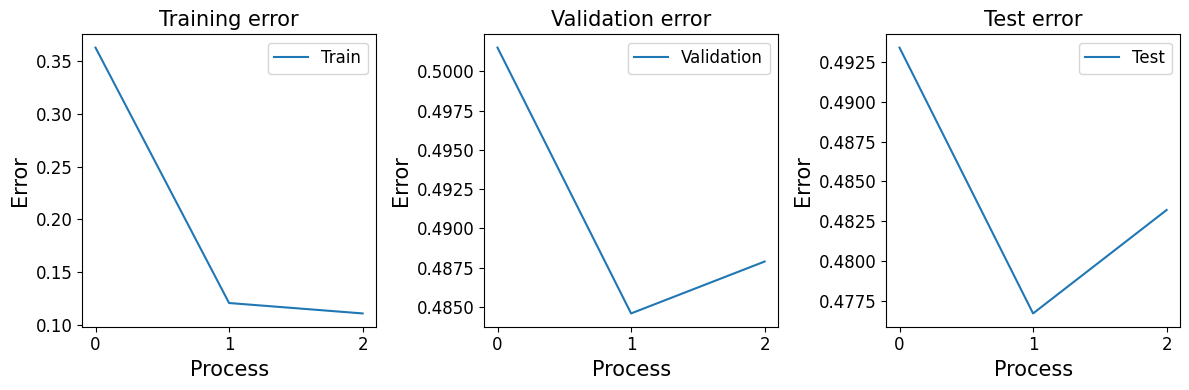

In [ ]:
visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)


In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 1000)              3073000   
                                                                 
 dense_49 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_50 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_51 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_52 (Dense)            (None, 10)                10010     
                                                                 
Total params: 6,086,010
Trainable params: 6,086,010
Non-trainable params: 0
_________________________________________________________________


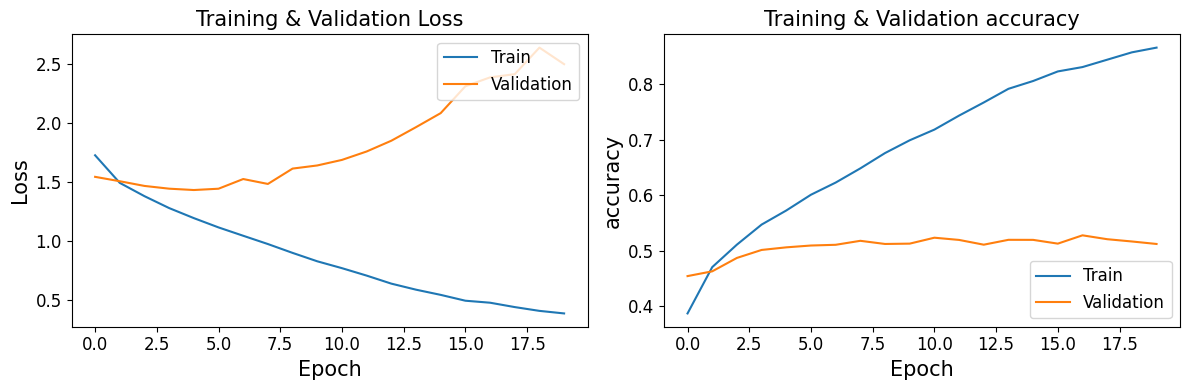

In [ ]:
# Step 11.2:  Plot the learning curves for training/validation
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(train_history.history['loss'], label='Train')
plt.plot(train_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(train_history.history['accuracy'], label='Train')
plt.plot(train_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Step 18: forth attempt: increase the epoches during training
def build_model(n_layers = 5, n_neurons = 1000):
    model = Sequential() # create Sequential model
    for i in range(n_layers-1):
          model.add(Dense(n_neurons, activation = 'relu')) # you can also try other types of activation functions

    model.add(Dense(10, activation = 'softmax'))  # the output must be softmax for multi-class classifcation
    return model

In [ ]:
# Step 18.1: let's use the same architecture in Step 17
model = build_model(n_layers = 5, n_neurons = 1000)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
# Step 18.2: let's re-use Step 16's code, and include the normalization step due to its improvement.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.astype(np.float32))
X_val_s = scaler.transform(X_val.astype(np.float32))
X_test_s = scaler.transform(X_test_flatten.astype(np.float32))

# Step 18.3: Let's start retraining the model with epochs = 30
train_history = model.fit(X_train_s,y_train, validation_data=(X_val_s,y_val), batch_size=128, epochs = 30)

Epoch 1/30
313/313 [==============================] - 4s 7ms/step - loss: 1.7354 - accuracy: 0.3876 - val_loss: 1.6121 - val_accuracy: 0.4325
Epoch 2/30
313/313 [==============================] - 2s 5ms/step - loss: 1.4993 - accuracy: 0.4709 - val_loss: 1.5486 - val_accuracy: 0.4502
Epoch 3/30
313/313 [==============================] - 2s 6ms/step - loss: 1.3834 - accuracy: 0.5105 - val_loss: 1.4521 - val_accuracy: 0.4934
Epoch 4/30
313/313 [==============================] - 2s 5ms/step - loss: 1.2912 - accuracy: 0.5405 - val_loss: 1.4376 - val_accuracy: 0.4970
Epoch 5/30
313/313 [==============================] - 2s 6ms/step - loss: 1.2077 - accuracy: 0.5699 - val_loss: 1.4187 - val_accuracy: 0.5133
Epoch 6/30
313/313 [==============================] - 2s 6ms/step - loss: 1.1226 - accuracy: 0.5969 - val_loss: 1.4285 - val_accuracy: 0.5140
Epoch 7/30
313/313 [==============================] - 2s 5ms/step - loss: 1.0503 - accuracy: 0.6216 - val_loss: 1.4185 - val_accuracy: 0.5177
Epoch 

In [ ]:
# Step 18.4: let's evaluate the model again, I expected to see worse validation results due to overfitting
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train_s,y_train),(X_val_s,y_val),(X_test_s,y_test))

313/313 [==============================] - 1s 2ms/step
Train error:  0.07184999999999997
Validation error:  0.4808
Test error:  0.48939999999999995


In [ ]:
# Step 18.5: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

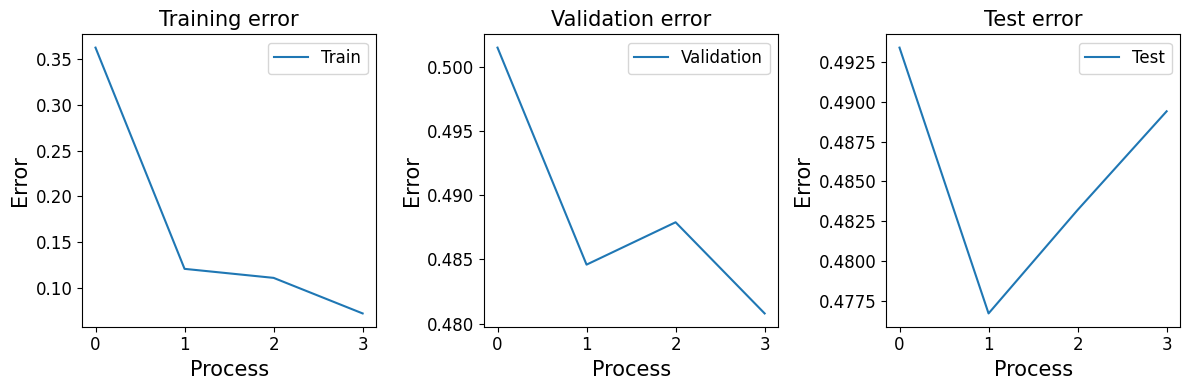

In [ ]:
visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)


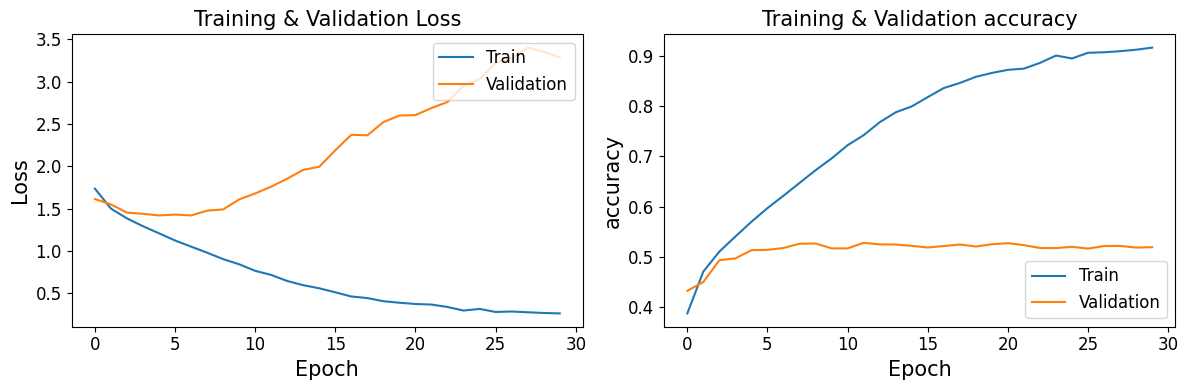

In [ ]:
# Step 19: Visualize the learning curves during training to diagnose the overfitting
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

# Step 19.1: Plot training & validation loss values
plt.plot(train_history.history['loss'], label='Train')
plt.plot(train_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(1,2,2)

# Step 19.2: Plot training & validation accuracy values
plt.plot(train_history.history['accuracy'], label='Train')
plt.plot(train_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
## Step 20: add a dropout layer to avoid overfitting
from tensorflow.keras.layers import Dropout
def build_model(n_layers = 2, n_neurons = 1000):
    model = Sequential() # create Sequential model
    for i in range(n_layers-1):
        model.add(Dense(n_neurons, activation = 'relu'))
        model.add(Dropout(0.2))
    model.add(Dense(10, activation = 'softmax')) 
    return model

In [ ]:
# Step 20.1: let's use the same architecture in Step 17
model = build_model(n_layers = 5, n_neurons = 1000)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
# Step 20.2: let's re-use Step 16's code, and include the normalization step due to its improvement.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.astype(np.float32))
X_val_s = scaler.transform(X_val.astype(np.float32))
X_test_s = scaler.transform(X_test_flatten.astype(np.float32))

# Step 20.3: Let's start retraining the model with epochs = 30
train_history = model.fit(X_train_s,y_train, validation_data=(X_val_s,y_val), batch_size=128, epochs = 30)

Epoch 1/30
313/313 [==============================] - 5s 7ms/step - loss: 1.8416 - accuracy: 0.3445 - val_loss: 1.6542 - val_accuracy: 0.4072
Epoch 2/30
313/313 [==============================] - 2s 6ms/step - loss: 1.6389 - accuracy: 0.4199 - val_loss: 1.5669 - val_accuracy: 0.4496
Epoch 3/30
313/313 [==============================] - 2s 6ms/step - loss: 1.5685 - accuracy: 0.4467 - val_loss: 1.5304 - val_accuracy: 0.4555
Epoch 4/30
313/313 [==============================] - 2s 6ms/step - loss: 1.5030 - accuracy: 0.4681 - val_loss: 1.4993 - val_accuracy: 0.4719
Epoch 5/30
313/313 [==============================] - 2s 6ms/step - loss: 1.4656 - accuracy: 0.4823 - val_loss: 1.4872 - val_accuracy: 0.4757
Epoch 6/30
313/313 [==============================] - 2s 6ms/step - loss: 1.4251 - accuracy: 0.4994 - val_loss: 1.4459 - val_accuracy: 0.4917
Epoch 7/30
313/313 [==============================] - 2s 6ms/step - loss: 1.3927 - accuracy: 0.5088 - val_loss: 1.4274 - val_accuracy: 0.5012
Epoch 

In [ ]:
# Step 20.4: let's evaluate the model again, I expected to see better validation results as we use regularizations
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train_s,y_train),(X_val_s,y_val),(X_test_s,y_test))


313/313 [==============================] - 1s 2ms/step
Train error:  0.25392499999999996
Validation error:  0.46619999999999995
Test error:  0.46440000000000003


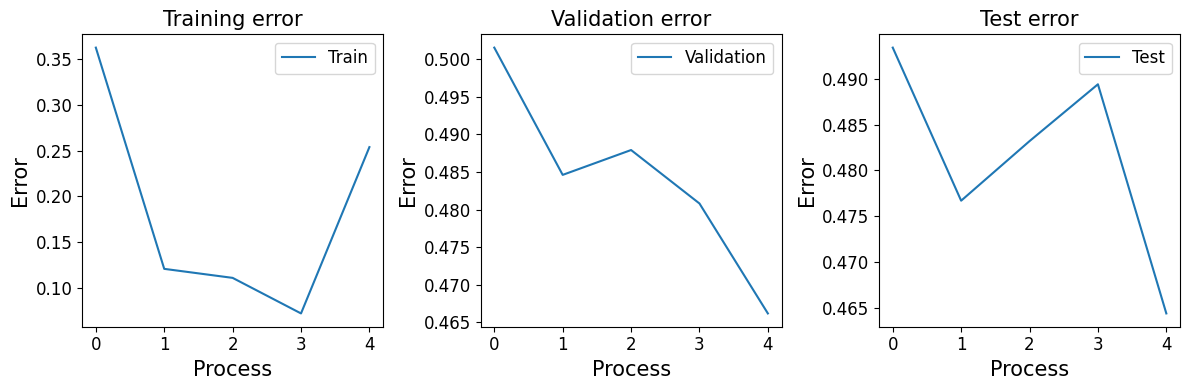

In [ ]:
# Step 20.5: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

In [ ]:
# Step 21.1: Adding normalization layer
from keras.layers import Dropout
from keras.layers import BatchNormalization

def build_model(n_layers = 2, n_neurons = 1000):
   model = Sequential() # create Sequential model
   for i in range(n_layers-1):
       model.add(Dense(n_neurons, activation = 'relu'))
       model.add(BatchNormalization()) # add normalization here
       model.add(Dropout(0.2))
   model.add(Dense(10, activation = 'softmax')) 
   return model

In [ ]:
# Step 21.2: retraining the model with same settings
model = build_model(n_layers = 5, n_neurons = 1000)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
# Step 21.2: let's re-use Step 16's code, and include the normalization step due to its improvement.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.astype(np.float32))
X_val_s = scaler.transform(X_val.astype(np.float32))
X_test_s = scaler.transform(X_test_flatten.astype(np.float32))

# Step 21.3: Let's start retraining the model with epochs = 30
train_history = model.fit(X_train_s,y_train, validation_data=(X_val_s,y_val), batch_size=128, epochs = 30)

Epoch 1/30
313/313 [==============================] - 7s 10ms/step - loss: 1.9592 - accuracy: 0.3428 - val_loss: 1.6206 - val_accuracy: 0.4292
Epoch 2/30
313/313 [==============================] - 3s 8ms/step - loss: 1.6197 - accuracy: 0.4302 - val_loss: 1.5221 - val_accuracy: 0.4540
Epoch 3/30
313/313 [==============================] - 2s 8ms/step - loss: 1.4794 - accuracy: 0.4800 - val_loss: 1.4541 - val_accuracy: 0.4870
Epoch 4/30
313/313 [==============================] - 3s 8ms/step - loss: 1.3881 - accuracy: 0.5114 - val_loss: 1.3950 - val_accuracy: 0.5180
Epoch 5/30
313/313 [==============================] - 3s 10ms/step - loss: 1.3173 - accuracy: 0.5328 - val_loss: 1.3728 - val_accuracy: 0.5207
Epoch 6/30
313/313 [==============================] - 3s 9ms/step - loss: 1.2559 - accuracy: 0.5527 - val_loss: 1.3650 - val_accuracy: 0.5229
Epoch 7/30
313/313 [==============================] - 3s 8ms/step - loss: 1.1971 - accuracy: 0.5718 - val_loss: 1.3608 - val_accuracy: 0.5317
Epoc

In [ ]:
# Step 21.4: let's evaluate the model again
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train_s,y_train),(X_val_s,y_val),(X_test_s,y_test))

313/313 [==============================] - 1s 2ms/step
Train error:  0.042525000000000035
Validation error:  0.4374
Test error:  0.4385


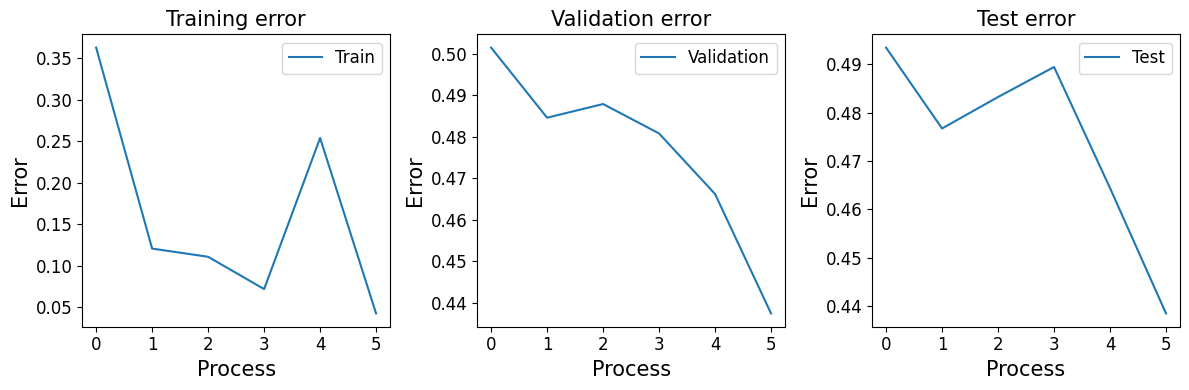

In [ ]:
# Step 21.5: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 1000)              3073000   
                                                                 
 batch_normalization_15 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dropout_23 (Dropout)        (None, 1000)              0         
                                                                 
 dense_64 (Dense)            (None, 1000)              1001000   
                                                                 
 batch_normalization_16 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dropout_24 (Dropout)        (None, 1000)            

In [ ]:
# Step 22.1: Add early stop into model training 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
keras_callbacks = [
      EarlyStopping(monitor='val_loss', patience=10, mode='min', min_delta=0.0001),
      ModelCheckpoint('./checkmodel.h5', monitor='val_loss', save_best_only=True, mode='min')
]

In [ ]:
# Step 22.2: retraining the model with same settings
model = build_model(n_layers = 5, n_neurons = 1000)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
# Step 22.2: let's re-use Step 16's code, and include the normalization step due to its improvement.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.astype(np.float32))
X_val_s = scaler.transform(X_val.astype(np.float32))
X_test_s = scaler.transform(X_test_flatten.astype(np.float32))

# Step 22.3: Let's start retraining the model with epochs = 50
train_history = model.fit(X_train_s,y_train, validation_data=(X_val_s,y_val), batch_size=128, epochs = 30, callbacks=keras_callbacks) # add callbacks here

Epoch 1/30
313/313 [==============================] - 8s 11ms/step - loss: 1.9651 - accuracy: 0.3442 - val_loss: 1.6648 - val_accuracy: 0.4378
Epoch 2/30
313/313 [==============================] - 3s 8ms/step - loss: 1.6047 - accuracy: 0.4377 - val_loss: 1.5215 - val_accuracy: 0.4630
Epoch 3/30
313/313 [==============================] - 3s 9ms/step - loss: 1.4683 - accuracy: 0.4805 - val_loss: 1.4418 - val_accuracy: 0.4991
Epoch 4/30
313/313 [==============================] - 3s 11ms/step - loss: 1.3829 - accuracy: 0.5121 - val_loss: 1.4118 - val_accuracy: 0.5009
Epoch 5/30
313/313 [==============================] - 3s 9ms/step - loss: 1.3115 - accuracy: 0.5367 - val_loss: 1.4169 - val_accuracy: 0.5089
Epoch 6/30
313/313 [==============================] - 3s 9ms/step - loss: 1.2529 - accuracy: 0.5541 - val_loss: 1.3719 - val_accuracy: 0.5207
Epoch 7/30
313/313 [==============================] - 3s 8ms/step - loss: 1.2008 - accuracy: 0.5740 - val_loss: 1.3774 - val_accuracy: 0.5308
Epoc

In [ ]:
# Step 22.4: let's evaluate the model again
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train_s,y_train),(X_val_s,y_val),(X_test_s,y_test))

313/313 [==============================] - 1s 2ms/step
Train error:  0.15312499999999996
Validation error:  0.4423
Test error:  0.4466


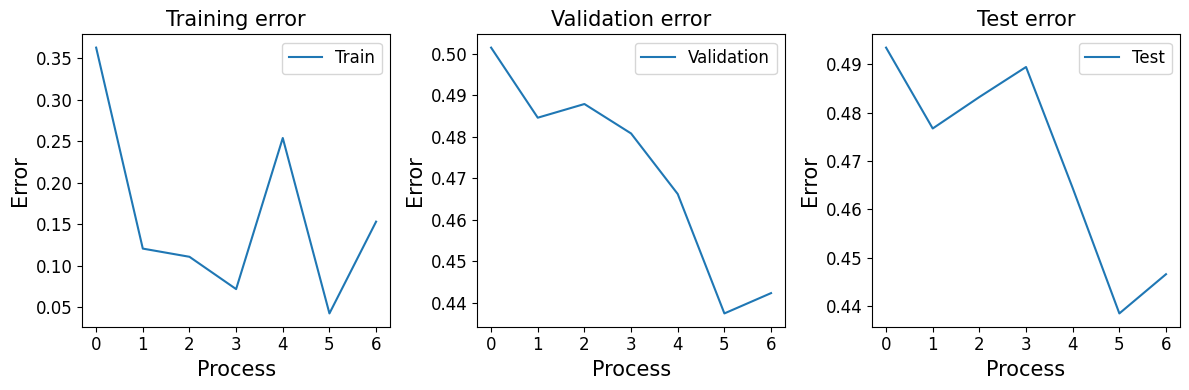

In [ ]:
# Step 22.5: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

In [ ]:
# Step 21.1: Adding normalization layer
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.regularizers import l2
def build_model(n_layers = 2, n_neurons = 1000):
   model = Sequential() # create Sequential model
   for i in range(n_layers-1):
       model.add(Dense(n_neurons, activation = 'relu', kernel_regularizer = l2(0.1), bias_regularizer = l2(0.1)))
       model.add(BatchNormalization()) # add normalization here
       model.add(Dropout(0.2))
   model.add(Dense(10, activation = 'softmax')) 
   return model

In [ ]:
# Step 21.2: retraining the model with same settings
model = build_model(n_layers = 5, n_neurons = 1000)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
# Step 21.2: let's re-use Step 16's code, and include the normalization step due to its improvement.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.astype(np.float32))
X_val_s = scaler.transform(X_val.astype(np.float32))
X_test_s = scaler.transform(X_test_flatten.astype(np.float32))

# Step 21.3: Let's start retraining the model with epochs = 30
train_history = model.fit(X_train_s,y_train, validation_data=(X_val_s,y_val), batch_size=128, epochs = 30)

Epoch 1/30
313/313 [==============================] - 8s 12ms/step - loss: 32.4517 - accuracy: 0.2636 - val_loss: 3.8425 - val_accuracy: 0.1776
Epoch 2/30
313/313 [==============================] - 3s 9ms/step - loss: 3.7353 - accuracy: 0.2626 - val_loss: 3.6617 - val_accuracy: 0.2507
Epoch 3/30
313/313 [==============================] - 3s 10ms/step - loss: 3.5663 - accuracy: 0.2673 - val_loss: 3.8445 - val_accuracy: 0.2094
Epoch 4/30
313/313 [==============================] - 3s 10ms/step - loss: 3.4907 - accuracy: 0.2667 - val_loss: 3.5490 - val_accuracy: 0.2414
Epoch 5/30
313/313 [==============================] - 3s 11ms/step - loss: 3.4454 - accuracy: 0.2713 - val_loss: 3.2173 - val_accuracy: 0.2479
Epoch 6/30
313/313 [==============================] - 3s 9ms/step - loss: 3.2633 - accuracy: 0.2748 - val_loss: 3.3231 - val_accuracy: 0.2436
Epoch 7/30
313/313 [==============================] - 3s 9ms/step - loss: 3.1956 - accuracy: 0.2810 - val_loss: 3.2996 - val_accuracy: 0.2371
E

In [ ]:
# Step 21.4: let's evaluate the model again
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train_s,y_train),(X_val_s,y_val),(X_test_s,y_test))

313/313 [==============================] - 1s 2ms/step
Train error:  0.718075
Validation error:  0.7181
Test error:  0.7177


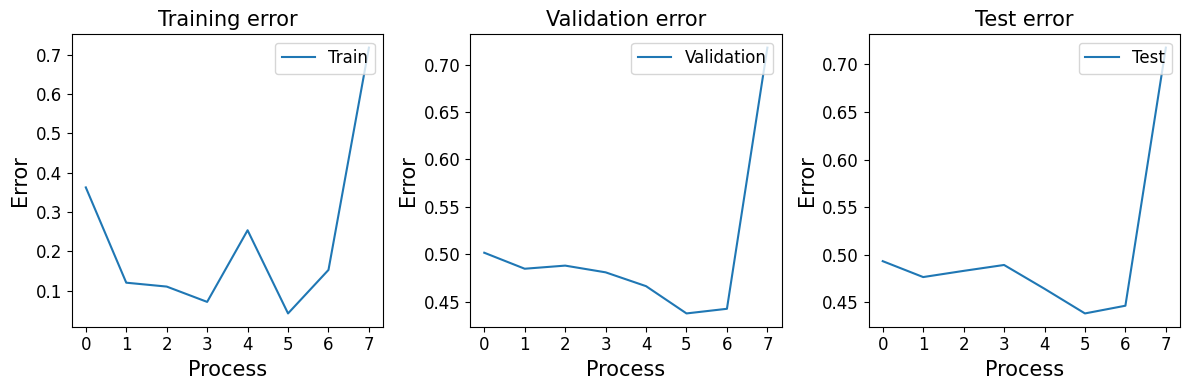

In [ ]:
# Step 21.5: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

In [ ]:
# Step 24: Use a convolutional neural network to improve the classification
# Step 24.1: Load dataset
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
# Step 24.2: Process the labels to get one-hot encoding
num_classes = len(labels_map)
from keras.utils.np_utils import to_categorical
y_train_onehot = to_categorical(y_train, num_classes)
y_test_onehot = to_categorical(y_test, num_classes)

In [ ]:
# Step 24.3: Normalize the features using min-max
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
# Step 24.4: Get training, validation dataset
X_train_s, X_val, y_train_s, y_val = train_test_split(X_train,y_train_onehot, test_size=0.2, random_state=42)

In [ ]:
# Step 24.5: Define convolutional neural network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D
from keras import regularizers
from keras.layers import Flatten,BatchNormalization,Dropout

In [ ]:
model = Sequential() # create Sequential model
model.add(Conv2D(32, (3,3), input_shape=(32,32,3), padding='same', activation = 'relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding='same')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), padding='same')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(10, activation = 'softmax')) 

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
# Step 24.6: Start model training
history = model.fit(X_train_s,y_train_s, validation_data=(X_val,y_val), batch_size=64, epochs = 20)

Epoch 1/20
625/625 [==============================] - 7s 8ms/step - loss: 1.6135 - accuracy: 0.4566 - val_loss: 1.9049 - val_accuracy: 0.3558
Epoch 2/20
625/625 [==============================] - 5s 8ms/step - loss: 1.2148 - accuracy: 0.5811 - val_loss: 1.1744 - val_accuracy: 0.6000
Epoch 3/20
625/625 [==============================] - 4s 7ms/step - loss: 1.0836 - accuracy: 0.6249 - val_loss: 1.0974 - val_accuracy: 0.6185
Epoch 4/20
625/625 [==============================] - 4s 7ms/step - loss: 1.0047 - accuracy: 0.6529 - val_loss: 0.9335 - val_accuracy: 0.6800
Epoch 5/20
625/625 [==============================] - 5s 8ms/step - loss: 0.9387 - accuracy: 0.6735 - val_loss: 0.9154 - val_accuracy: 0.6857
Epoch 6/20
625/625 [==============================] - 4s 7ms/step - loss: 0.9001 - accuracy: 0.6888 - val_loss: 0.9304 - val_accuracy: 0.6710
Epoch 7/20
625/625 [==============================] - 4s 7ms/step - loss: 0.8610 - accuracy: 0.7034 - val_loss: 1.0193 - val_accuracy: 0.6580
Epoch 

In [ ]:
# Step 24.7: Let's evaluate model and visualize the improvements again
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train_s,y_train_s),(X_val,y_val),(X_test,y_test))

313/313 [==============================] - 1s 2ms/step
Train error:  0.22382500000000005
Validation error:  0.31589999999999996
Test error:  0.3164


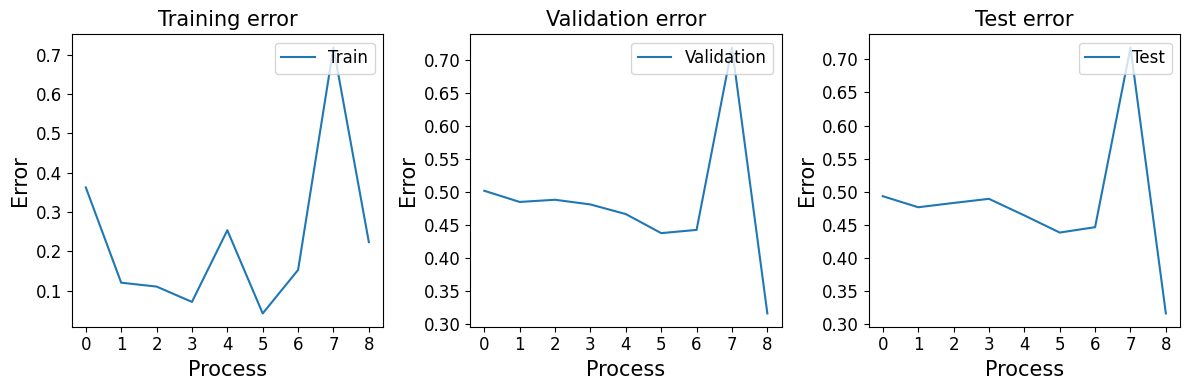

In [ ]:

improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)
visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)